Iteration    0: COst 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02  w:  6.500e+00, b: 4.00000e+00
Iteration 1000: COst 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01  w:  1.949e+02, b: 1.08228e+02
Iteration 2000: COst 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01  w:  1.975e+02, b: 1.03966e+02
Iteration 3000: COst 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01  w:  1.988e+02, b: 1.01912e+02
Iteration 4000: COst 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02  w:  1.994e+02, b: 1.00922e+02
Iteration 5000: COst 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02  w:  1.997e+02, b: 1.00444e+02
Iteration 6000: COst 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02  w:  1.999e+02, b: 1.00214e+02
Iteration 7000: COst 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03  w:  1.999e+02, b: 1.00103e+02
Iteration 8000: COst 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03  w:  2.000e+02, b: 1.00050e+02
Iteration 9000: COst 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03  w:  2.000e+02, b: 1.00024e+02
(w,b) foun

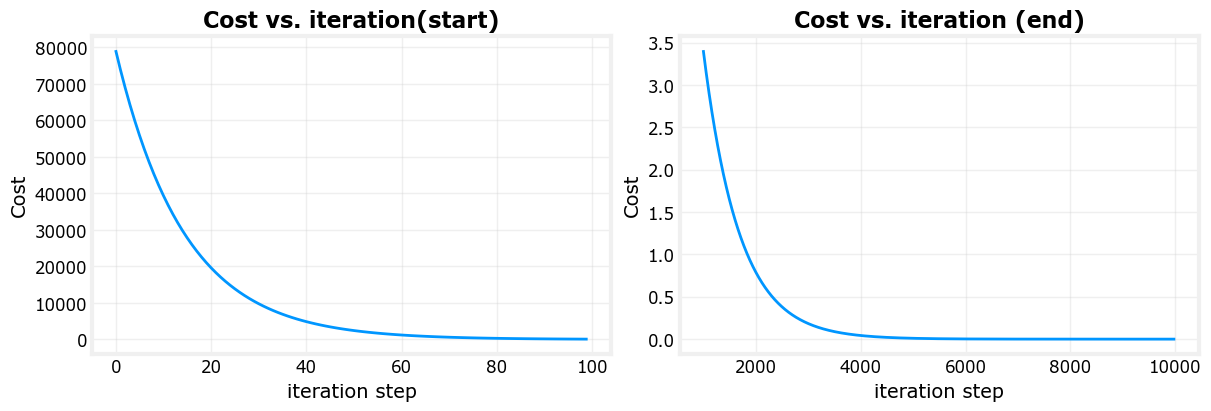

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars
Iteration    0: COst 2.58e+05  dj_dw: -6.500e+02, dj_db: -4.000e+02  w:  5.200e+02, b: 3.20000e+02
Iteration    1: COst 7.82e+05  dj_dw:  1.130e+03, dj_db:  7.000e+02  w: -3.840e+02, b:-2.40000e+02
Iteration    2: COst 2.37e+06  dj_dw: -1.970e+03, dj_db: -1.216e+03  w:  1.192e+03, b: 7.32800e+02
Iteration    3: COst 7.19e+06  dj_dw:  3.429e+03, dj_db:  2.121e+03  w: -1.551e+03, b:-9.63840e+02
Iteration    4: COst 2.18e+07  dj_dw: -5.974e+03, dj_db: -3.691e+03  w:  3.228e+03, b: 1.98886e+03
Iteration    5: COst 6.62e+07  dj_dw:  1.040e+04, dj_db:  6.431e+03  w: -5.095e+03, b:-3.15579e+03
Iteration    6: COst 2.01e+08  dj_dw: -1.812e+04, dj_db: -1.120e+04  w:  9.402e+03, b: 5.80237e+03
Iteration    7: COst 6.09e+08  dj_dw:  3.156e+04, dj_db:  1.950e+04  w: -1.584e+04, b:-9.80139e+03
Iteration    8: COst 1.85e+09  dj_dw: -5.496e+04, dj_db: -

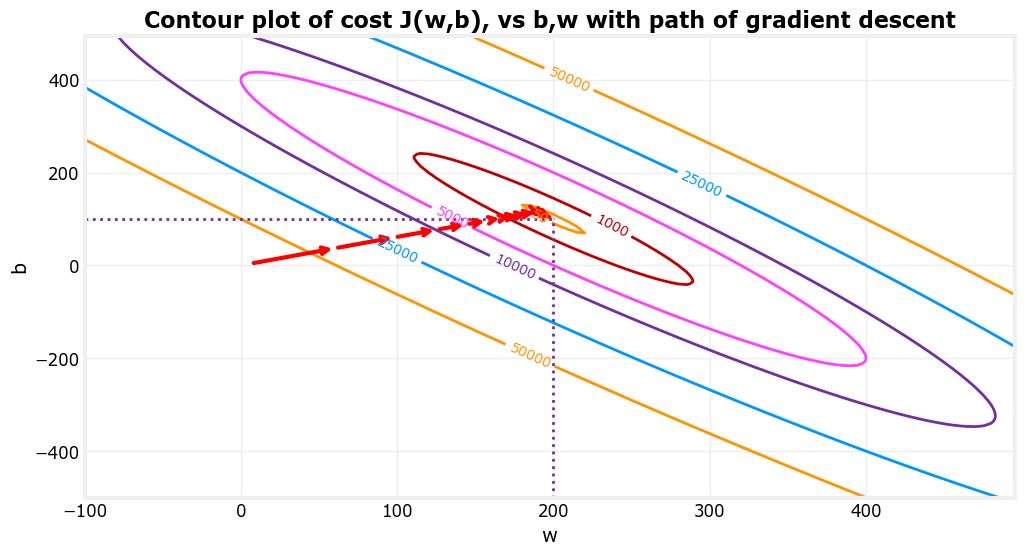

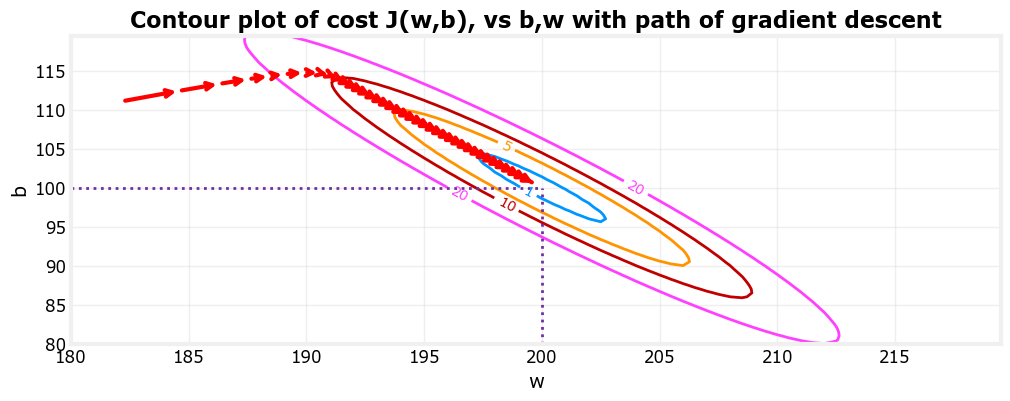

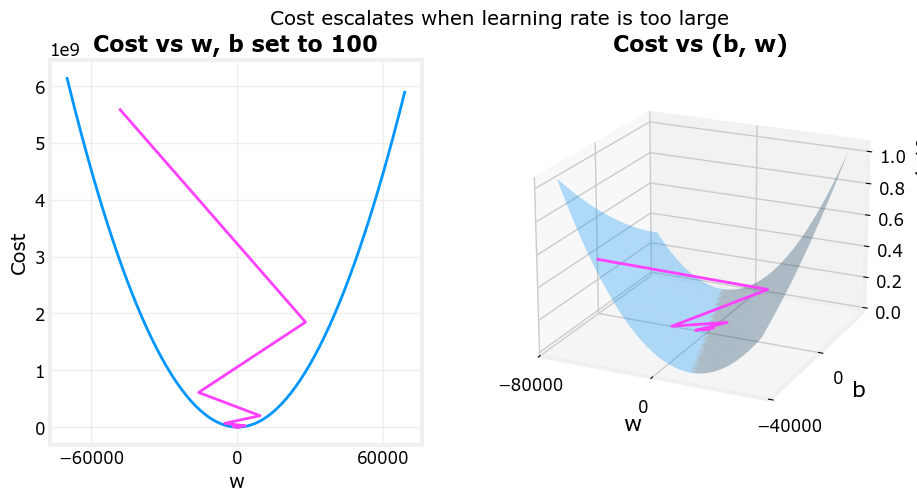

In [ ]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
import os
import lab_utils_uni


plt.rcParams.update({
    'figure.figsize': (10, 6),
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'axes.titleweight': 'bold',
    'axes.grid': True,
    'grid.alpha': 0.3,
    'lines.linewidth': 2,
    'lines.markersize': 8,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
})

# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost
"""
    in class we were taugth that the gradien descent was: 
    repeat until convergence{
    w = w - alpha * (sigma * cost/sigma * w)2
    b = b - alpha * (sigma * cost/sigma * b)3
    }
    b and w are updated simultaneously
    the gradient will be defined as:
    (sigma * cost/sigma * w) = 1/m * sum of 0 till m -1 (fw,b(x^(i)) - y^(i)) * x^(i) 4
    (sigma * cost/sigma * b) = 1/m * sum of 0 till m -1 (fw,b(x^(i)) - y^(i)) 5
    it means that you calculate the partial derivatives for all parameters before updating any of the parameters
    for implementation i will use 3 functions:
    compute_gradient = implements equations 4 and 5
    compute_cost which we already implemented
    gradient_descent it`ll utilize both functions above
"""
def compute_gradient(x,y,w,b):
    """
    computes the gradient for linear regression
    Args:
        x(ndarray (m,)): Data, m examples
        y(ndarray (m,)): target values
        w,b(scalar): model parameters
        returns 
        dj_dw (scalar): the gradient of the cost w.r.t the parameters w
        dj_db (scalar): the gradient of the cost w.r.t the parameter b
    """
    #number of training examples
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i])* x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_dw, dj_db

def gradient_descent(x,y,w_in,b_in, alpha, num_iters, cost_function, gradiente_function):
    """
    Performs gradient descent to fit w,b. Updats w,b by taking 
    num_iters gradient steps with learning rate alpha
    Args:
    x (ndarray (m,)): Data, m examples
    y (ndarray (m,)): target values
    w_in, b_in (scalar): initial values of model parameters
    alpha (float): learning rate
    num_iters (int): number of iterations to run gradient descent
    cost_function: function to call to produce cost
    gradient_function: function to call to produce gradient
    returns
    w (scalar): updated value of parameter after running gradient descent
    b (scalar): updated value of parameter after running gradient descent
    j_history (list): History of cost values
    p_history (list): history of parameters [w,b]
    """
    w = copy.deepcopy(w_in) #avoid modifying global w_in
    # an array to store cost J and w`s at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        # calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradiente_function(x,y,w,b)

        #update parameters using equation 3 above
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # save cost J at each iteration
        if i < 100000:
            J_history.append( cost_function(x,y,w,b))
            p_history.append([w,b])
        # print cost at every intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: COst {J_history[-1]:0.2e} ", 
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e} ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
    return w,b,J_history, p_history # return those for graphing
    
# initialize parameters 
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha,iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f}, {b_final:8.4f})")

# we know that the cost should decrease after each iteration if the algorithm is sucessful
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)"); ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost'); ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step'); ax2.set_xlabel('iteration step')
plt.show()

# now that we have w and b we can make accurate predictions
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

#You can show the progress of gradient descent during its execution by plotting the cost over iterations on a contour plot of the cost(w,b).
fig, ax = plt.subplots(1,1, figsize=(12, 6))
lab_utils_uni.plt_contour_wgrad(x_train, y_train, p_hist, ax)
fig, ax = plt.subplots(1,1, figsize=(12, 4))
lab_utils_uni.plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)
"""
in the lecture there was a discussion related to the learning rate alpha, The larger the alpha is
the faster the convergence to a solution, but if it is too large it may diverge, our example
is a good illustration of this convergence but if we mess with the alpha value we can see
"""
# initialize parameters
w_init = 0
b_init = 0  
# set alpha to a large value
iterations = 10
tmp_alpha = 8.0e-1
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha,iterations, compute_cost, compute_gradient)
# now lets plot the cost vs iteration to see the divergence
lab_utils_uni.plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()
"""
Above, the left graph shows w's progression over the first few steps of gradient descent. 
w oscillates from positive to negative and cost grows rapidly. Gradient Descent is operating on both 
w and b simultaneously, so one needs the 3-D plot on the right for the complete picture
 """